In [1]:
!pip install pandas
!pip install numpy

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2 DSPL/loan_data_set.csv')

In [25]:
df.dtypes # each column's datatype

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [26]:
# 1. Identify the most frequent values for all categorical features

# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

# Iterate over each categorical column and find the most frequent value
for column in categorical_columns:
    most_frequent_value = df[column].mode()[0] # Get the most frequent value
    count = df[column].value_counts()[most_frequent_value]  # Count its occurrences
    print(f"Categorical Feature: {column}, Most frequent value: {most_frequent_value}, Count: {count}")

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
Categorical Feature: Loan_ID, Most frequent value: LP001002, Count: 1
Categorical Feature: Gender, Most frequent value: Male, Count: 489
Categorical Feature: Married, Most frequent value: Yes, Count: 398
Categorical Feature: Dependents, Most frequent value: 0, Count: 345
Categorical Feature: Education, Most frequent value: Graduate, Count: 480
Categorical Feature: Self_Employed, Most frequent value: No, Count: 500
Categorical Feature: Property_Area, Most frequent value: Semiurban, Count: 233
Categorical Feature: Loan_Status, Most frequent value: Y, Count: 422


In [27]:
# Q2.  Give descriptive statistics of numerical features in the dataset. Comment about the distribution of data from it.
numerical_cols = df.select_dtypes(include=['number']).columns

numerical_stats=df[numerical_cols].describe()
numerical_stats

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [57]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_stats=df[categorical_cols].describe(include='O')
categorical_stats

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


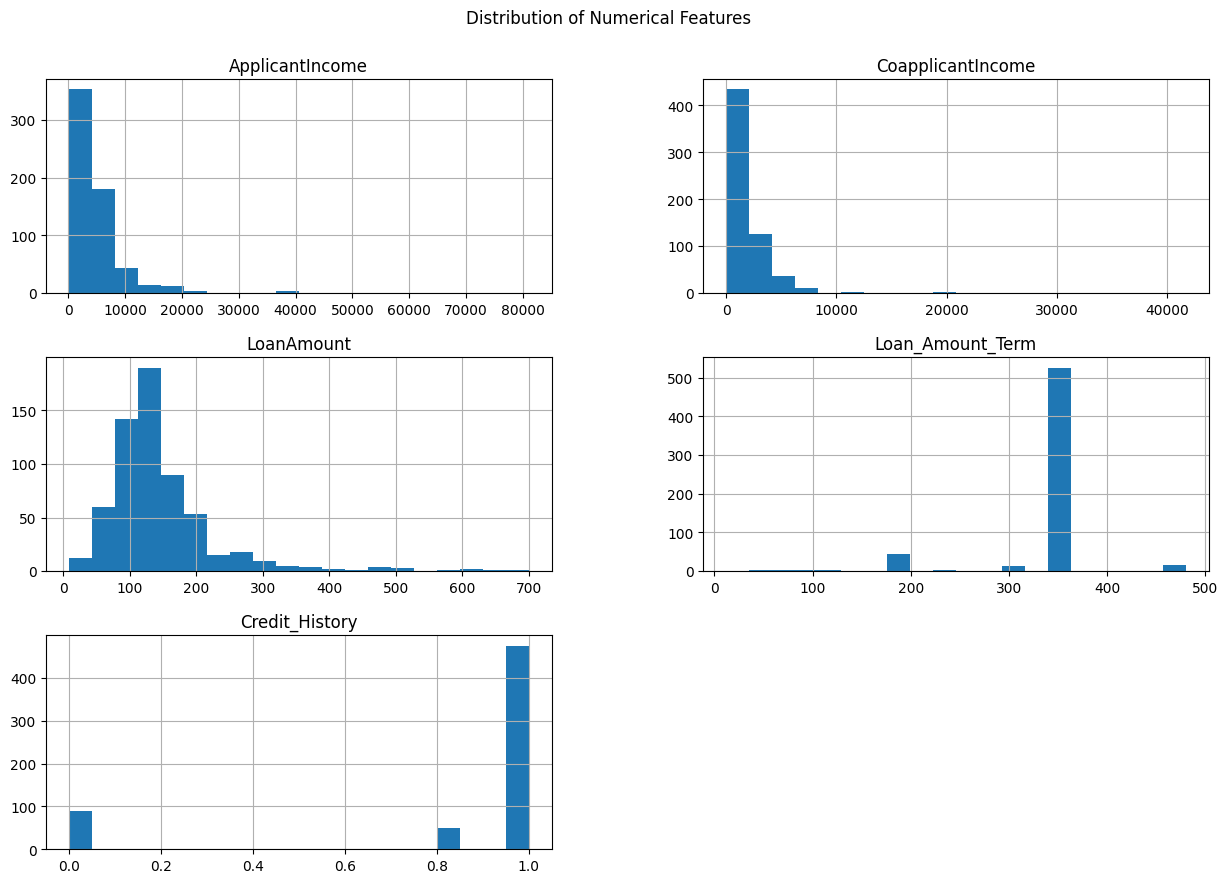

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features", y=0.95)
plt.show()


## Inference from above data :

* Numerical Features:

ApplicantIncome and CoapplicantIncome:
Both have a positive skew, indicating more applicants with lower incomes.

LoanAmount:
The mean and median are close, implying a relatively symmetrical distribution.

Loan_Amount_Term:
The mean and median are also close, suggesting a relatively even spread.

Credit_History:
The mean is slightly lower than the median, but most values are concentrated around 1 (positive credit history).

* Categorical Features:

Gender:
Most applicants are male (most frequent value).

Married:
Most applicants are married.

Dependents:
A significant portion of applicants have no dependents.

Education:
Graduates are the most common education level among applicants.

Self_Employed:
A majority of applicants are not self-employed.

Property_Area:
Semiurban areas are the most common property location.

Loan_Status:
Most loan applications have been approved (most frequent value is "Y").

In [30]:
# Q3. Replace the missing values in categorial features using appropriate techniques.

# Identify categorical columns objects
categorical_columns_with_missing = df.select_dtypes(include=['object']).columns

print("Number of missing values before mode imputation:")
print(df[categorical_columns_with_missing].isnull().sum())

# Replace missing values with the most frequent category (mode)
for column in categorical_columns_with_missing:
    most_frequent_category = df[column].mode().iloc[0]
    df[column].fillna(most_frequent_category, inplace=True)

# Verify that missing values have been replaced
print("Number of missing values after mode imputation:")
print(df[categorical_columns_with_missing].isnull().sum())


Number of missing values before mode imputation:
Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64
Number of missing values after mode imputation:
Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64


In [31]:
print(df.isnull().sum()) #numerical nulls are still present


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [33]:
!pip install scikit-learn category_encoders
from sklearn.preprocessing import LabelEncoder
from category_encoders import OrdinalEncoder, TargetEncoder


In [42]:
# Q4. Demonstrate various encoding techniques for categorical features.
categorical_columns = df.select_dtypes(include=['object']).columns

# a. Label Encoding
label_encoded_df = df.copy()
label_encoder = LabelEncoder()
for column in categorical_columns:
    label_encoded_df[column] = label_encoder.fit_transform(df[column])

print("Label Encoding:")
print(label_encoded_df)

Label Encoding:
     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           0          0              0   
1          1       1        1           1          0              0   
2          2       1        1           0          0              1   
3          3       1        1           0          1              0   
4          4       1        0           0          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           0          0              0   
610      610       1        1           3          0              0   
611      611       1        1           1          0              0   
612      612       1        1           2          0              0   
613      613       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN       

In [43]:
# b. One-Hot Encoding
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_columns)

print("One-Hot Encoding:")
print(one_hot_encoded_df)



One-Hot Encoding:
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Loan_ID_LP001002  Loan_ID_LP001003  Loan_ID_LP001005  \
0               1.0         

In [44]:
# c. Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
ordinal_encoded_df = df.copy()
ordinal_encoded_df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])

print("Ordinal Encoding:")
print(ordinal_encoded_df)



Ordinal Encoding:
     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          1       1        1           1          1              1   
1          2       1        2           2          1              1   
2          3       1        2           1          1              2   
3          4       1        2           1          2              1   
4          5       1        1           1          1              1   
..       ...     ...      ...         ...        ...            ...   
609      610       2        1           1          1              1   
610      611       1        2           4          1              1   
611      612       1        2           2          1              1   
612      613       1        2           3          1              1   
613      614       2        1           1          1              2   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN     

In [53]:
# Q5. for numerical features, replace missing values using
# a. using simple imputer (mean, median)
from sklearn.impute import SimpleImputer

# Select numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns

# Replace missing values with mean
imputer_mean = SimpleImputer(strategy='mean')
df_mean_imputed = pd.DataFrame(imputer_mean.fit_transform(df[numerical_columns]), columns=numerical_columns)


# Replace missing values with median
imputer_median = SimpleImputer(strategy='median')
df_median_imputed = pd.DataFrame(imputer_median.fit_transform(df[numerical_columns]), columns=numerical_columns)

# Print the resulting DataFrames
print("Simple Imputer with Mean:")
print(df_mean_imputed.head())
print(df_mean_imputed.isnull().sum())

print("\nSimple Imputer with Median:")
print(df_median_imputed.head())
print(df_median_imputed.isnull().sum())


Simple Imputer with Mean:
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0  146.412162             360.0   
1           4583.0             1508.0  128.000000             360.0   
2           3000.0                0.0   66.000000             360.0   
3           2583.0             2358.0  120.000000             360.0   
4           6000.0                0.0  141.000000             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

Simple Imputer with Median:
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0  146.412162             360.0   
1           4583.0             1508.0  128.000000             360.0   
2           3000.0                0.0   66.000000        

In [54]:
# b. using random sample imputation
# Define function for random sample imputation
def random_sample_imputation(data, column):
    random_sample = data[column].dropna().sample(data[column].isnull().sum(), random_state=0)
    random_sample.index = data[data[column].isnull()].index
    data.loc[data[column].isnull(), column] = random_sample

# Perform random sample imputation for each numerical column
df_random_sample_imputed = df[numerical_columns].copy()
for column in numerical_columns:
    random_sample_imputation(df_random_sample_imputed, column)

print("Random Sample Imputation:")
print(df_random_sample_imputed.head())




Random Sample Imputation:
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0  146.412162             360.0   
1           4583.0             1508.0  128.000000             360.0   
2           3000.0                0.0   66.000000             360.0   
3           2583.0             2358.0  120.000000             360.0   
4           6000.0                0.0  141.000000             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  


In [55]:
df[numerical_columns] = df_mean_imputed  # Change to df_median_imputed or df_random_sample_imputed if needed

print(df.isnull().sum()) #numerical nulls are still present


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [58]:
# Q6. Give descriptive statistics of numerical features in the dataset after handling missing values. Comment about the distribution of data from it.

numerical_cols = df.select_dtypes(include=['number']).columns
numerical_stats=df[numerical_cols].describe()
numerical_stats


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
'''
7. Plot following graphs. Label X and Y axis, give appropriate title to the graph.
 a. Plot histogram for Loan Amount and mention ur observations
 b. Plot histogram for Loan Amount and mention ur observations
 c. plot bar graph showing income for graduate and non-graduate applicant and mention ur
observations
 d. Plot the boxplot for Loan amount. Give the five value summary from it.
 e. Comment on the correlation between Applicant's income and Loan amount using
appropriate graph.
 f. Give descriptive statistics of numerical features in the dataset. Comment about the
distribution of data from it.
'''

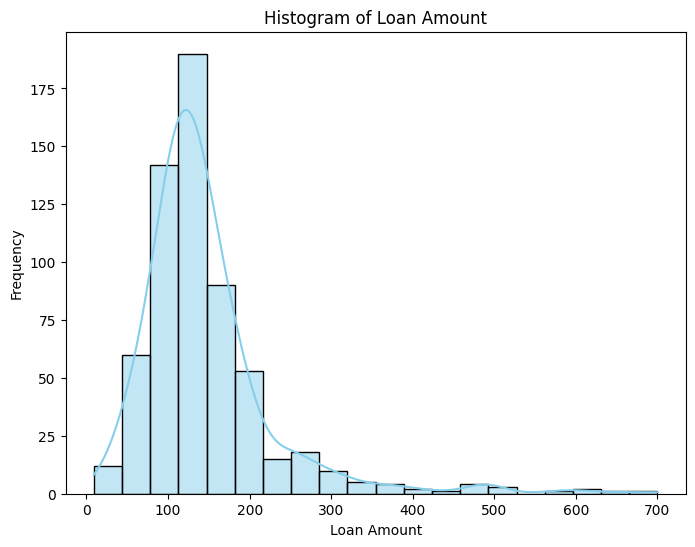

In [64]:
#  a. Plot histogram for Loan Amount and mention ur observations

plt.figure(figsize=(8, 6))
sns.histplot(df['LoanAmount'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Observations:
# - The histogram shows the distribution of loan amounts in the dataset.
# - The distribution appears to be slightly right-skewed, with a peak around the lower loan amounts.
# - There are some outliers on the higher end of the loan amount, which contribute to the right-skewness.



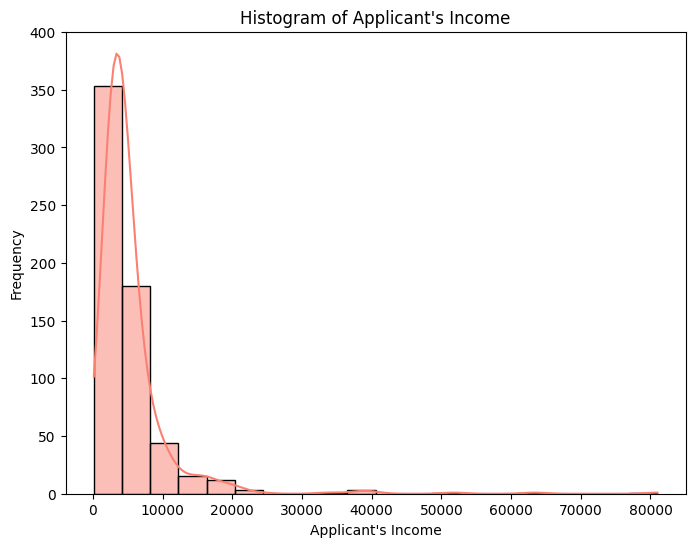

In [65]:
#  b. Plot histogram for Loan Amount and mention ur observations

plt.figure(figsize=(8, 6))
sns.histplot(df['ApplicantIncome'], bins=20, kde=True, color='salmon')
plt.title("Histogram of Applicant's Income")
plt.xlabel("Applicant's Income")
plt.ylabel('Frequency')
plt.show()

# Observations:
# - The histogram displays the distribution of applicant incomes in the dataset.
# - The distribution is heavily right-skewed, with a large number of applicants having relatively low incomes.
# - There are some outliers on the higher end of the income scale.


<ipython-input-66-0e8e05d87e27>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='ApplicantIncome', data=df, palette='Set2')


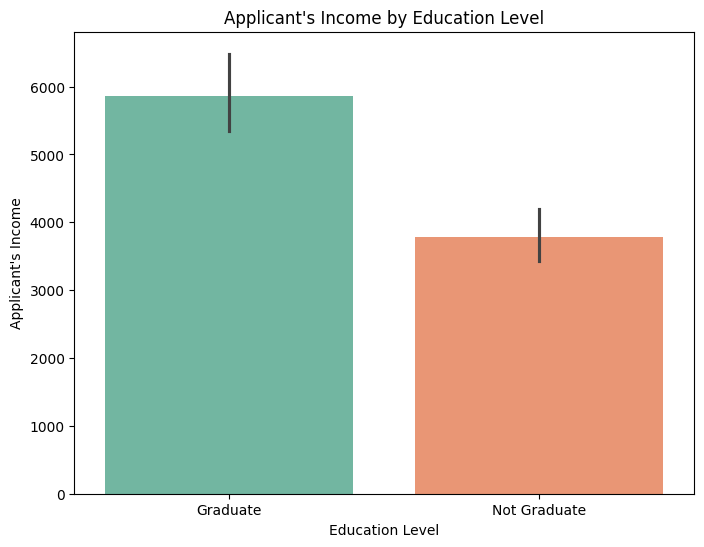

In [66]:
#  c. plot bar graph showing income for graduate and non-graduate applicant and mention ur observations

plt.figure(figsize=(8, 6))
sns.barplot(x='Education', y='ApplicantIncome', data=df, palette='Set2')
plt.title("Applicant's Income by Education Level")
plt.xlabel('Education Level')
plt.ylabel("Applicant's Income")
plt.show()

# Observations:
# - The bar graph compares the incomes of graduate and non-graduate applicants.
# - On average, graduate applicants tend to have higher incomes compared to non-graduate applicants.


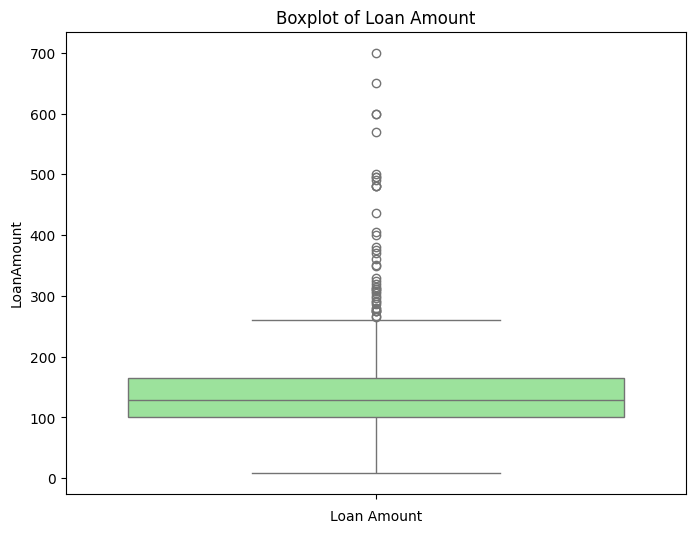

In [67]:
#  d. Plot the boxplot for Loan amount. Give the five value summary from it.

plt.figure(figsize=(8, 6))
sns.boxplot(df['LoanAmount'], color='lightgreen')
plt.title('Boxplot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

# Observations:
# - The boxplot provides a visual summary of the distribution of loan amounts.
# - The five-number summary (minimum, Q1, median, Q3, maximum) can be observed from the boxplot.


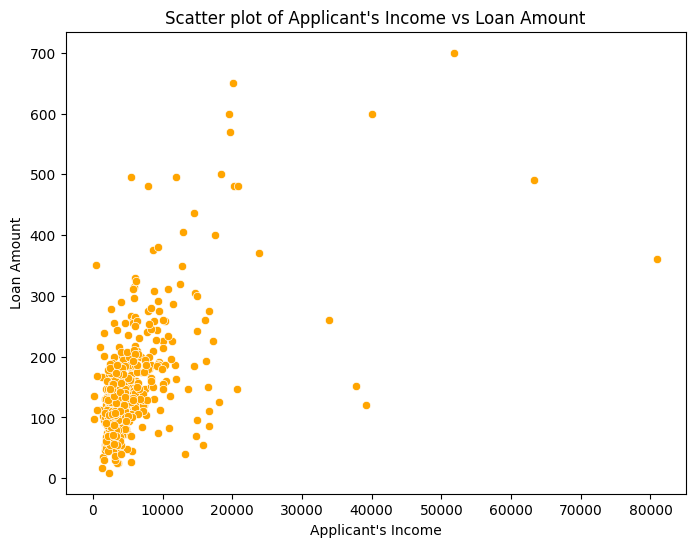

In [68]:
#  e. Comment on the correlation between Applicant's income and Loan amount using appropriate graph.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df, color='orange')
plt.title("Scatter plot of Applicant's Income vs Loan Amount")
plt.xlabel("Applicant's Income")
plt.ylabel('Loan Amount')
plt.show()

# Observations:
# - The scatter plot shows the relationship between applicant's income and loan amount.
# - There seems to be a positive correlation between applicant's income and loan amount, indicating that higher incomes may be associated with larger loan amounts.


In [69]:
#  f. Give descriptive statistics of numerical features in the dataset. Comment about the distribution of data from it.

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

descriptive_statistics = df[numerical_columns].describe()

print("Descriptive Statistics of Numerical Features:")
print(descriptive_statistics)

# Comments on the distribution of data
# The distribution of data is:
# - LoanAmount: Right-skewed, with a few outliers.
# - ApplicantIncome: Right-skewed, with a few outliers.
# - Credit_History: Mostly 1 (good credit history), with a few 0 (bad credit history).
# - Loan_Status: Mostly 1 (loan approved), with a few 0 (loan rejected).



Descriptive Statistics of Numerical Features:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.000000   
std        6109.041673        2926.248369   84.037468         64.372489   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.842199  
std          0.349681  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
